# 1. Libraries & Sample Data
The first step is to load our Python Libraries and download the sample data. The dataset represents Apple stock price (1d bars) for the year 2010

In [81]:
# Load Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [82]:
# Download Sample Data AAPL_2009-2010_6m_raw_1d.csv
data = pd.read_csv("datasets/AAPL_2009-2010_6m_raw_1d.csv")

# 2. Exploratory Data Analysis
Next, we want to analyze our data. Display the data as a dataframe, and plot some relevant data so you can get an idea of what our dataset looks like.

In [83]:
# Display as Dataframe
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,589372000.0
1,2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,812366800.0
2,2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,636241200.0
3,2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,658064400.0
4,2009-04-07,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Index data by Date
data.set_index("Date", inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,589372000.0
2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,812366800.0
2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,636241200.0
2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,658064400.0
2009-04-07,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Date'>

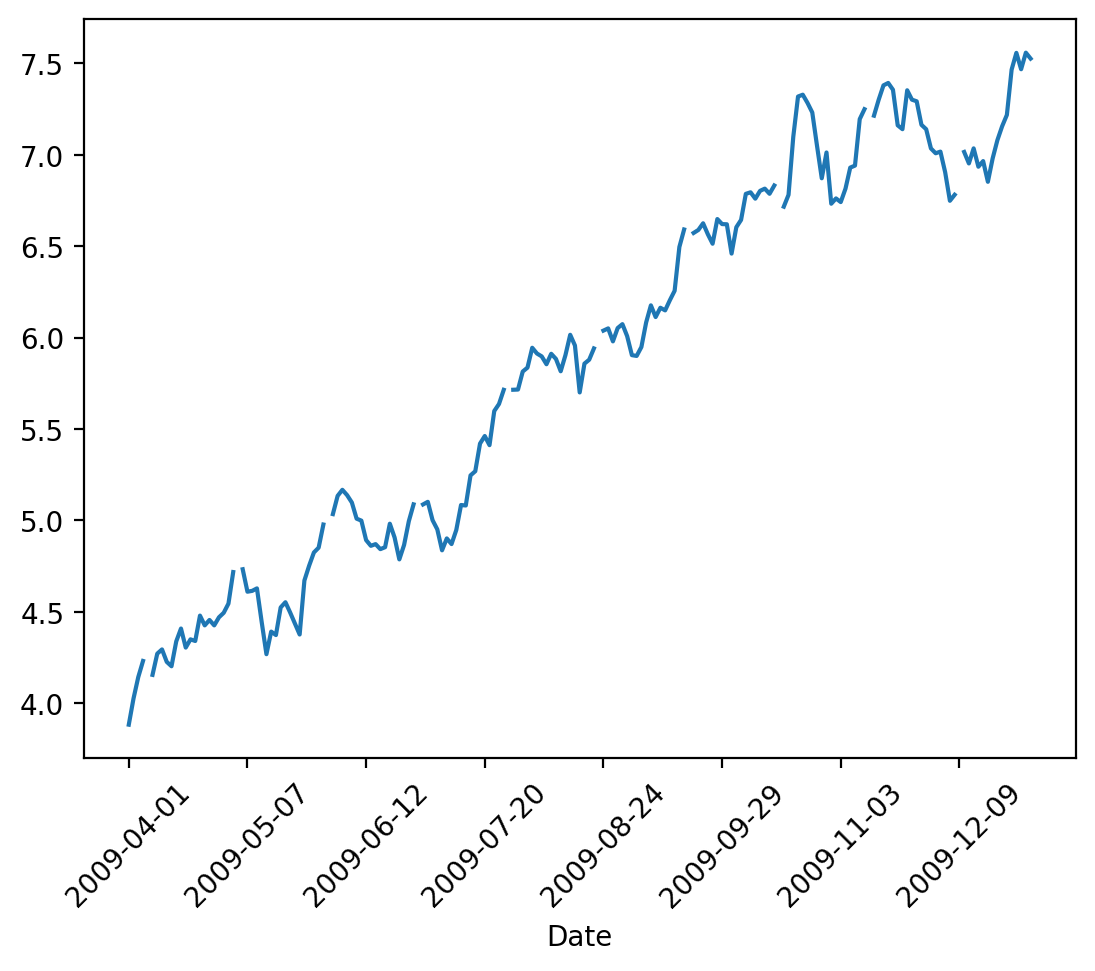

In [85]:
# Plot the Close Data
data['Close'].plot(rot=45)

# 3. Data Cleaning
Next, we need to clean our data for training our model. This requires removal of NaN values.

In [86]:
# Check for null values
data.isnull().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [87]:
# forward fill missing values
data.ffill(inplace=True)

In [88]:
# Check for null values to ensure it is now zero
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [89]:
data.reset_index().to_csv('datasets/AAPL_2009-2010_6m_cleaned_1d.csv')

# 4. Feature Definition

Now that we have cleaned our stock data, we can define some financial indicators, or "features," to train our model on. These indicators provide valuable insights into price trends, volatility, and market behavior. We will calculate the following popular indicators:

1. **20-day Close Moving Average**: This indicator smooths out price fluctuations by averaging the closing prices over the past 20 days, helping identify long-term trends, in real scenerio we use 200-day. 
2. **5-day Close Moving Average**: This shorter-term moving average highlights short-term price trends and momentum in the market, in real scenerio we use 50-day. 
3. **20-day Close Bollinger Bands**: These bands measure price volatility by plotting upper and lower bounds around the 20-day moving average, indicating potential overbought or oversold conditions, in real scenerio we use 50-day.
4. **20-day Historical Volatility of Log Returns of Close Price**: This metric quantifies the degree of price variation over the past 20 days, providing insight into market risk and uncertainty.

In [90]:
data['MA5'] = data["Close"].rolling(5).mean()
data['MA20'] = data["Close"].rolling(20).mean()
data['STD20'] = data["Close"].rolling(20).std()
data['BB_upper'] = data['MA20'] + 2 * data['STD20']
data['BB_lower'] = data['MA20'] - 2 * data['STD20']
data['Log_Ret'] = np.log(data['Close'] / data['Close'].shift(1))
data['Vol20'] = data['Log_Ret'].rolling(window=20).std() * np.sqrt(252)
data.head()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
Date,,,,,,,,,,,,,
2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,589372000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,812366800.0,NaN,NaN,NaN,NaN,NaN,0.036318,NaN
2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,636241200.0,NaN,NaN,NaN,NaN,NaN,0.028686,NaN
2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,658064400.0,NaN,NaN,NaN,NaN,NaN,0.020987,NaN
2009-04-07,4.105000,4.241071,4.045714,4.230357,3.576569,658064400.0,4.102071,NaN,NaN,NaN,NaN,0.000000,NaN


In [91]:
# Remove rows with MA=NaN
data.dropna(axis=0, inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
Date,,,,,,,,,,,,,
2009-04-30,4.507857,4.535714,4.461429,4.493929,3.799404,498489600.0,4.453572,4.312857,0.128631,4.570118,4.055596,0.005499,0.287544
2009-05-01,4.492857,4.569643,4.492857,4.544286,3.841980,397516000.0,4.477429,4.338804,0.119607,4.578017,4.099590,0.011143,0.267026
2009-05-04,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.529857,4.367518,0.137583,4.642685,4.092351,0.037257,0.278159
2009-05-05,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.588214,4.391839,0.154067,4.699974,4.083704,0.000000,0.273591
2009-05-06,4.761786,4.767857,4.650714,4.732143,4.000803,473538800.0,4.640786,4.416929,0.166724,4.750376,4.083481,0.003251,0.272976


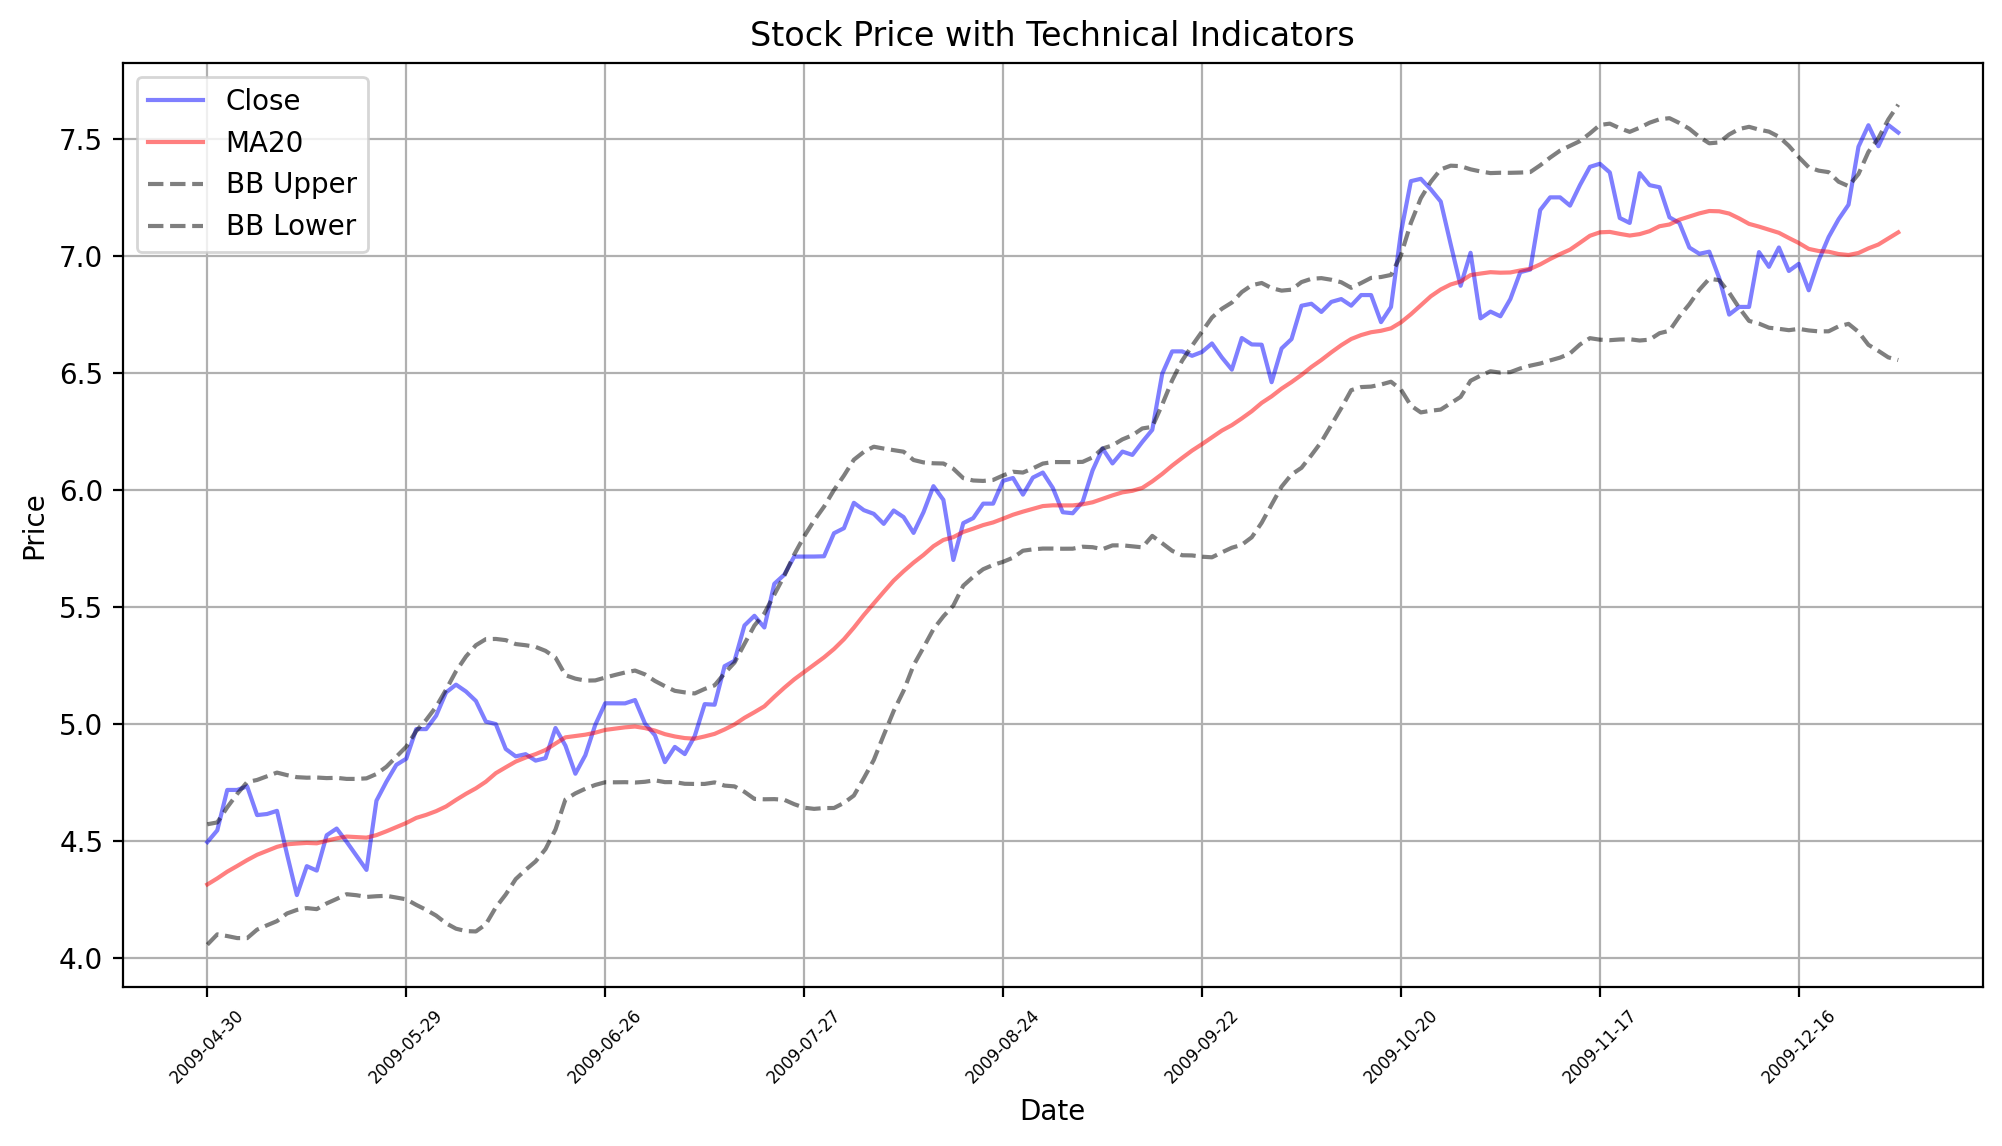

In [92]:
# Plot Features on One Chart: Close, MA20, BB Upper, BB Lower
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(data.index, data['MA20'], label='MA20', color='red', alpha=0.5)
plt.plot(data.index, data['BB_upper'], label='BB Upper', color='black', alpha=0.5, linestyle='--')
plt.plot(data.index, data['BB_lower'], label='BB Lower', color='black', alpha=0.5, linestyle='--')
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(data.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()


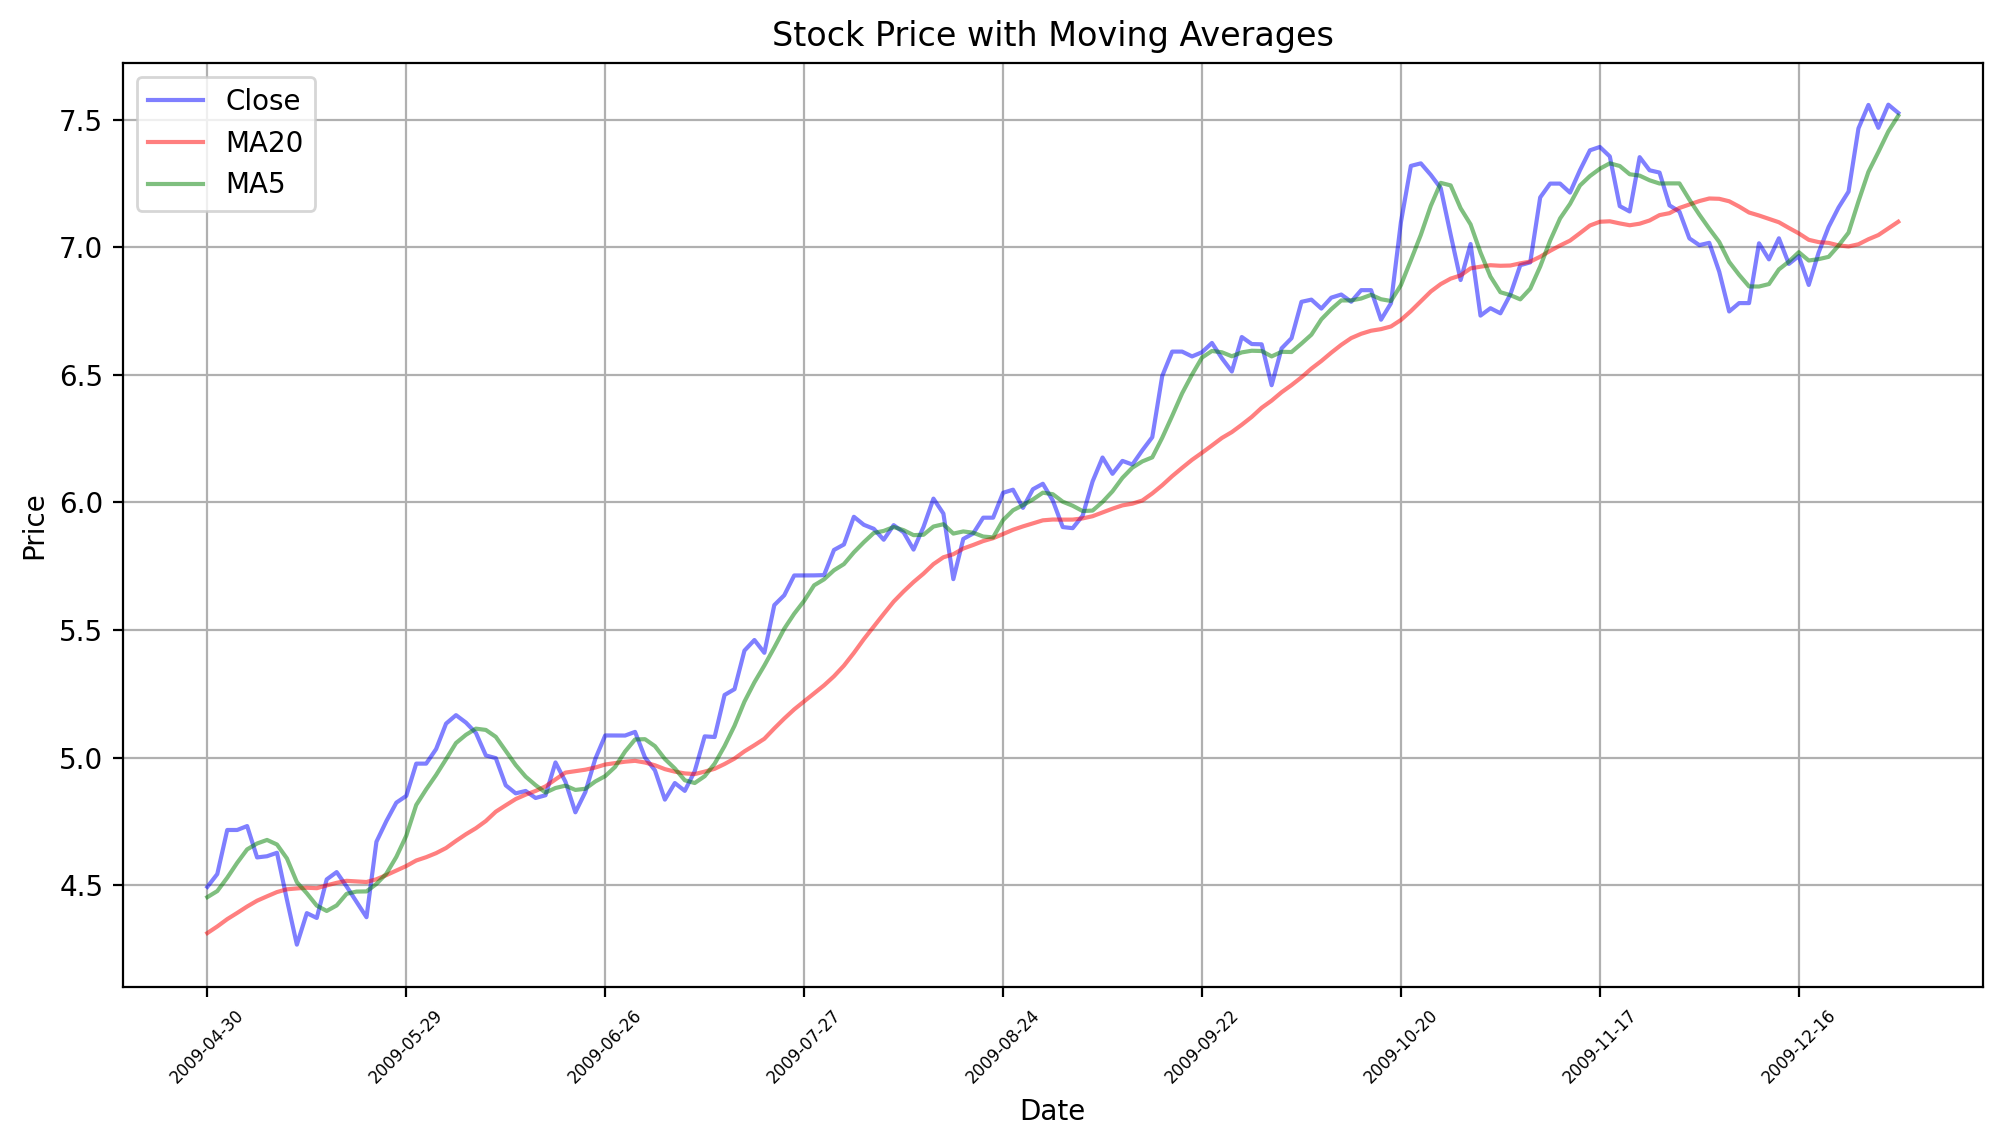

In [93]:
# Plot Features on One Chart: Close, MA20, MA5
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(data.index, data['MA20'], label='MA20', color='red', alpha=0.5)
plt.plot(data.index, data['MA5'], label='MA5', color='green', alpha=0.5)
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(data.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()

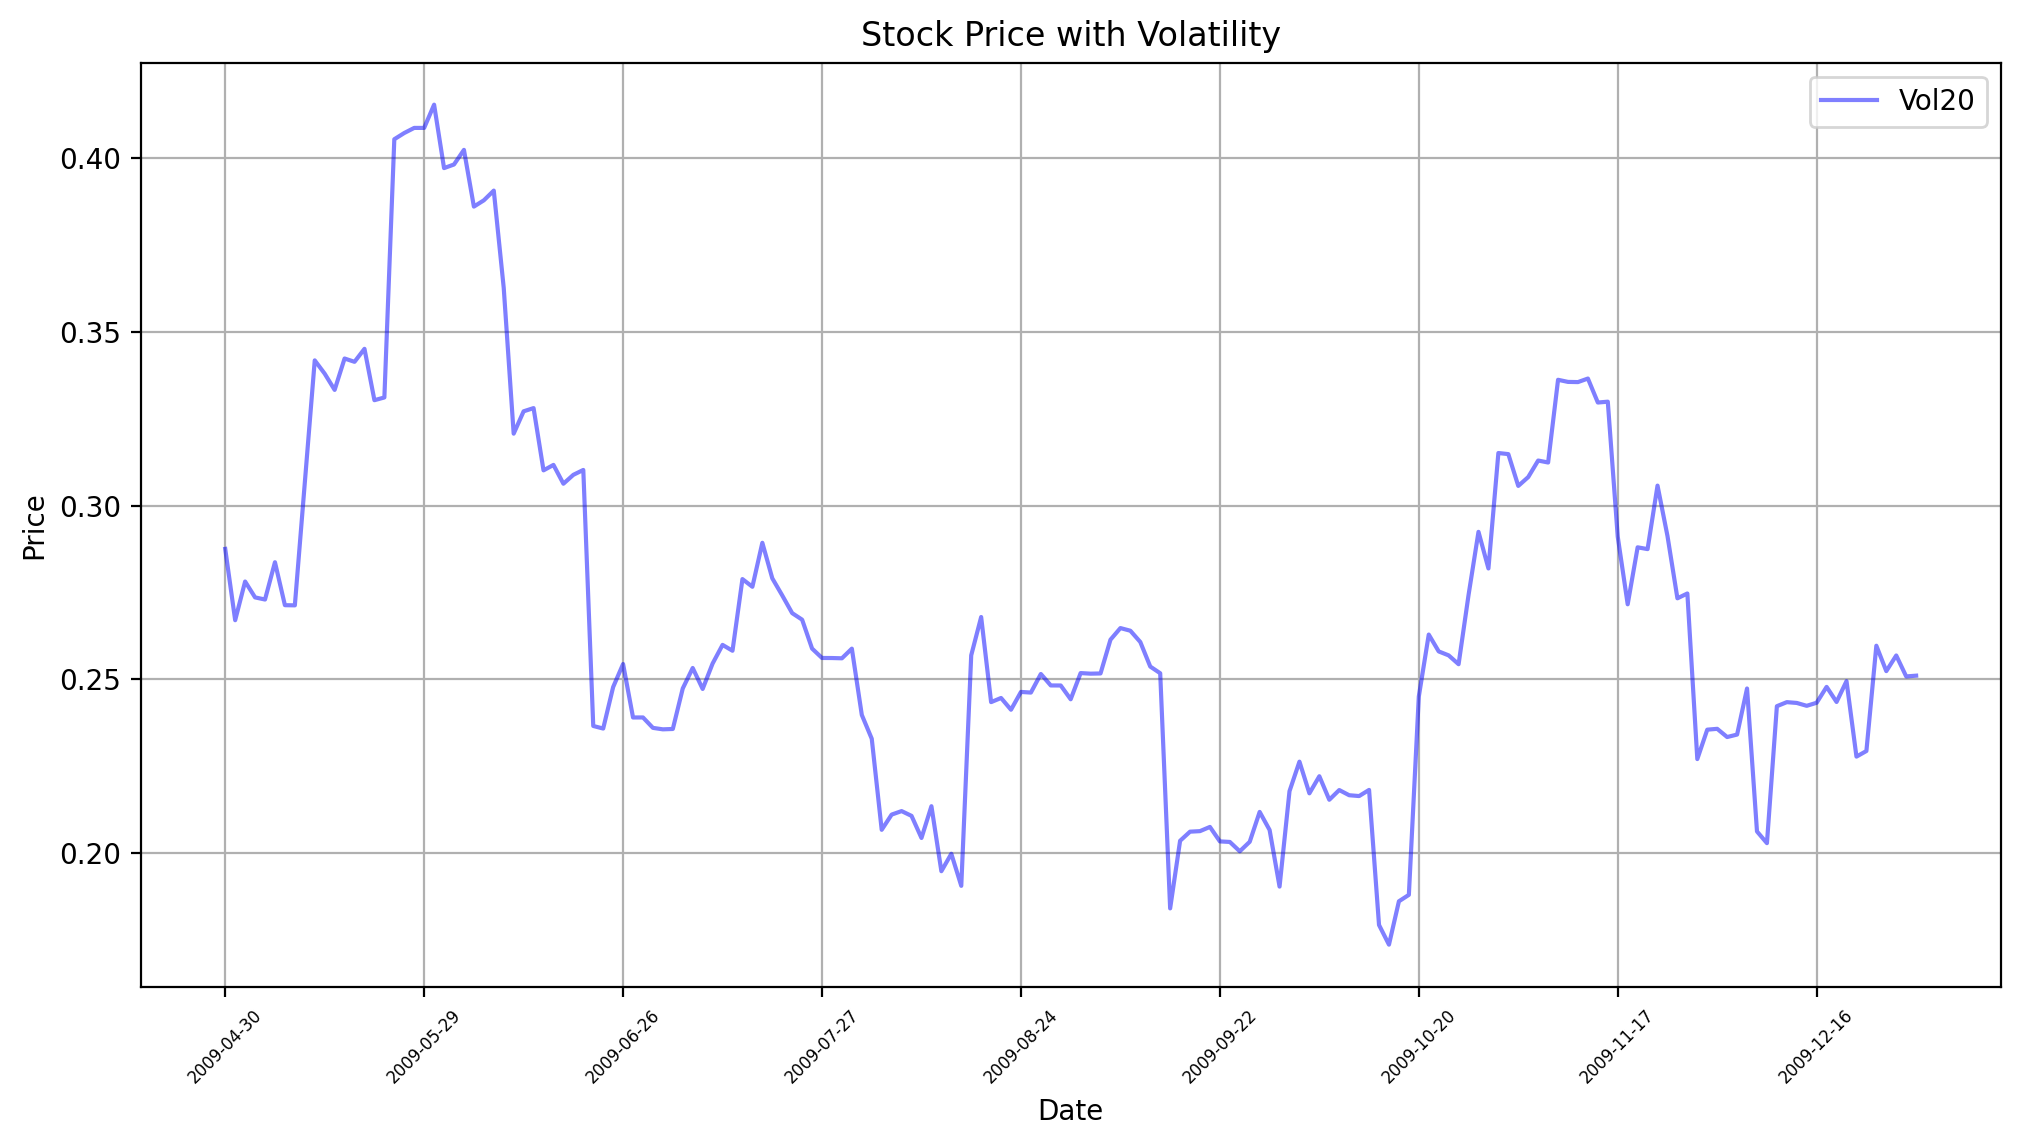

In [94]:
# Plot Features: Volatility
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Vol20'], label='Vol20', color='blue', alpha=0.5)
plt.title('Stock Price with Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(data.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()

In [95]:
data.to_csv('datasets/AAPL_2009-2010_6m_all_features_1d.csv')